| ![nsdf](https://www.sci.utah.edu/~pascucci/public/NSDF-smaller.PNG)  | [National Science Data Fabric](https://nationalsciencedatafabric.org/) [Jupyter notebook](https://jupyter.org/) <br> created by  [Valerio Pascucci](http://cedmav.com/) and  [Giorgio Scorzelli](https://www.sci.utah.edu/people/scrgiorgio.html)  |  
|---|:---:|

#  <center> This is a preview of the data
![Visualization of Covid-19 cases](https://www.sci.utah.edu/~pascucci/public/CHESS-visus_recon_combined_1_fullres_zip.gif)

# Import Panel

Column
    [0] Column
        [0] FloatSlider(end=3.0, name='frequency', start=-1.0, value=1.0)
    [1] Row
        [0] Matplotlib(Figure, height=345, name='interactive00101', width=460)
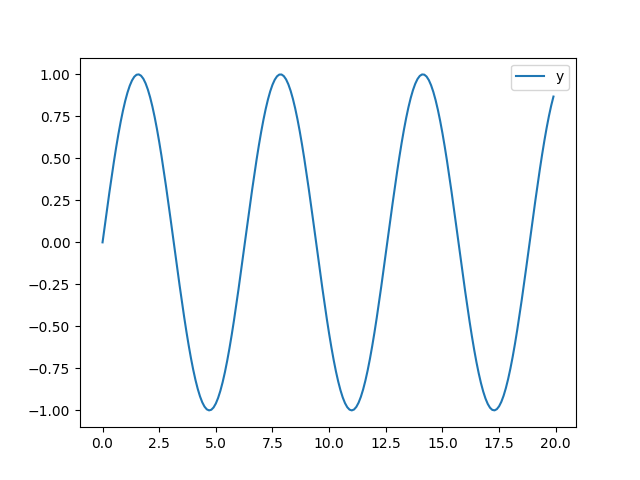

In [1]:
import numpy as np
import panel as pn
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import panel as pn
pn.extension('vtk') # VTK is needed for  VTKVolumePlot 

def TestPanel():
    
    def MyApp(frequency=1.0):
        amplitude=1.0
        xs = np.arange(200)/200*20.0
        ys = np.sin(frequency*xs)
        df = pd.DataFrame(dict(y=ys), index=xs)
        fig = df.plot().get_figure()
        plt.close(fig)
        return fig        
        return GeneratePlot(df, frequency=frequency)

    return pn.interact(MyApp)

TestPanel()

# Import OpenVisus

In [2]:
import os,sys
sys.path.append(r"C:\projects\OpenVisus\build\RelWithDebInfo")
import OpenVisus as ov
print("OpenVisus imported correctly")

OpenVisus imported correctly


# Load OpenVisus dataset

In [3]:
url='http://atlantis.sci.utah.edu:80/mod_visus?dataset=chess-zip&cached=1'
db=ov.LoadDataset(url)
print(f"""
Loaded dataset 
   url={db.getUrl()} 
   fields={db.getFields()} 
   logic_box={db.getLogicBox()}
""")


Loaded dataset 
   url=http://atlantis.sci.utah.edu/mod_visus?dataset=chess%2Dzip 
   fields=['data'] 
   logic_box=([0, 0, 0], [1193, 402, 330])



In [4]:
def MyApp(max_resolution=21, width=700, height=1000):

    data=db.read(max_resolution=max_resolution,time=0)
    print(f"db.read returned shape={data.shape} dtype={data.dtype}")

     # generate a panel for numpy data
    volume = pn.panel(
        data, 
        sizing_mode='stretch_both', 
        height=200, 
        orientation_widget =True,
        display_slices=True,
        spacing = (1, 1, 1),
        controller_expanded=False)

    # other widgets, with callbacks
    experiment  = pn.widgets.IntSlider(name='Experiment', start=0, end=1, step=1, value=0 )
    @pn.depends(experiment)
    def experiment_callback(value):
        nonlocal volume
        data=db.read(max_resolution=max_resolution,time=value)
        volume.object = data
        return " "    
    
    slider_i = pn.widgets.IntSlider(name='i-slice', start=0, end=data.shape[0], value = data.shape[0]//2 )
    @pn.depends(slider_i)
    def slider_i_callback(value):
        nonlocal volume
        volume.slice_i = value 
        return " "    
    
    slider_j = pn.widgets.IntSlider(name='j-slice', start=0, end=data.shape[1], value = data.shape[1]//2 )
    @pn.depends(slider_j)
    def slider_j_callback(value):
        nonlocal volume
        volume.slice_j = value 
        return " "    
    
    slider_k = pn.widgets.IntSlider(name='k-slice', start=0, end=data.shape[2], value = data.shape[2]//2 )
    @pn.depends(slider_k)
    def slider_k_callback(value):
        nonlocal volume
        volume.slice_k = value 
        return " "    
    
    show_volume = pn.widgets.Checkbox(name='Show Volume',value=True)
    @pn.depends(show_volume)
    def show_volume_callback(value):
        nonlocal volume
        volume.display_volume = value 
        return " "    
    
    show_slices = pn.widgets.Checkbox(name='Show Slices',value=True)
    @pn.depends(show_slices)
    def show_slices_calback(value):
        nonlocal volume
        volume.display_slices = value 
        return " "    

    main_layout=pn.Column(
        experiment,
        slider_i,
        slider_j,
        slider_k,
        pn.Row(
            show_volume,
            show_slices
        ),
        volume, 
        experiment_callback,
        slider_i_callback,
        slider_j_callback,
        slider_k_callback,
        show_volume_callback,
        show_slices_calback,
        width = width,
        height = height,
        css_classes=['panel-widget-box'],
        sizing_mode='stretch_width',
        width_policy='max')

    return main_layout

MyApp()

db.read returned shape=(42, 51, 299) dtype=float32


Column(css_classes=['panel-widget-box'], height=1000, sizing_mode='stretch_width', width=700, width_policy='max')
    [0] IntSlider(name='Experiment')
    [1] IntSlider(end=42, name='i-slice', value=21)
    [2] IntSlider(end=51, name='j-slice', value=25)
    [3] IntSlider(end=299, name='k-slice', value=149)
    [4] Row
        [0] Checkbox(name='Show Volume', value=True)
        [1] Checkbox(name='Show Slices', value=True)
    [5] VTKVolume(ndarray, controller_expanded=False, display_slices=True, height=200, orientation_widget=True, sizing_mode='stretch_both', slice_i=21, slice_j=25, slice_k=149)
    [6] ParamFunction(function, _pane=Markdown)
    [7] ParamFunction(function, _pane=Markdown)
    [8] ParamFunction(function, _pane=Markdown)
    [9] ParamFunction(function, _pane=Markdown)
    [10] ParamFunction(function, _pane=Markdown)
    [11] ParamFunction(function, _pane=Markdown)

---------------------------
Copyright (c) 2021 **Valerio Pascucci & Giorgio Scorzelli** 

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

**The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.** 

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.